In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("coffee_beans_info_blend_updated_2.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   원두 유형    149 non-null    object
 1   디카페인여부   149 non-null    int64 
 2   원두 이름    149 non-null    object
 3   원산지      149 non-null    object
 4   품종       75 non-null     object
 5   로스터리     74 non-null     object
 6   생산 지역    75 non-null     object
 7   가공방식     75 non-null     object
 8   맛        149 non-null    object
 9   산미       149 non-null    int64 
 10  바디감      149 non-null    int64 
 11  단맛       149 non-null    int64 
 12  로스팅 포인트  149 non-null    int64 
 13  쓴맛       149 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 16.4+ KB


In [46]:
data = df[['원두 이름', '맛', '산미', '바디감', '단맛', '쓴맛']]

In [47]:
data.dropna(inplace=True)

/tmp/ipykernel_88655/1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   원두 이름   149 non-null    object
 1   맛       149 non-null    object
 2   산미      149 non-null    int64 
 3   바디감     149 non-null    int64 
 4   단맛      149 non-null    int64 
 5   쓴맛      149 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 7.1+ KB


In [49]:
data

,원두 이름,맛,산미,바디감,단맛,쓴맛
0,볼리비아 쿠시요 자바 코코 내추럴,"산미 있는, 무거운, 베리, 초콜릿",3,4,4,1
1,콜롬비아 카사 네그라 카투라 디카페인,"달콤한, 밸런스, 부드러운, 초콜릿, 시트러스",2,3,4,2
2,콜롬비아 엑셀소 디카페인,"달콤한, 고소한, 초콜릿, 곡물, 시트러스",1,4,4,3
3,탄자니아 아카시아힐즈 켄트 워시드,"달콤한, 고소한, 밸런스, 깔끔한, 바닐라, 견과류, 깔끔한한",3,4,4,2
4,에티오피아 구지 겔라냐 게샤 G1 무산소 워시드 스페셜 리저브,"달콤한, 산미 있는, 시나몬, 가벼운",4,3,3,1
...,...,...,...,...,...,...
144,파나마 핀카 산타 테레사 게이샤 내추럴,"달콤한, 산미 있는, 꽃, 허브, 화사한, 트로피칼",2,2,5,1
145,파나마 산타마리아 게이샤 내츄럴,"달콤한, 꽃, 허브, 풍부한, 화사한, 주스, 트로피칼",4,2,4,1
146,파나마 핀카 하트만 게이샤 내츄럴,"달콤한, 산미 있는, 부드러운, 초콜릿, 풍부한, 가벼운, 주스, 트로피칼",4,4,5,1
147,페루 이네스 파타 게이샤 워시드,"산미 있는, 깔끔한, 꽃, 풍부한, 화사한, 시트러스",4,3,4,1


In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

# # 데이터 예시
# data = pd.DataFrame({
#     '원두명': ['Kenya Embu AB Washed', '에티오피아 코케허니 G1 내추럴', '케냐 키리나가 AA TOP', '에티오피아 예가체프 G1 코케 워시드P'],
#     '맛&향': ['상큼,산미,밸런스,허브,깔끔한,화사한', '달콤,산미,베리,꽃,초콜릿', '산미,묵직,긴여운,시트러스', '달콤,상큼,산미,꽃,허브,시트러스,트로피칼'],
#     '산미': [4.0, 4.0, 3.0, 3.0],
#     '바디감': [2.0, 3.0, 3.0, 2.0],
#     '단맛': [3.0, 3.0, 3.0, 4.0],
#     '로스팅': [1.0, 3.0, 3.0, 2.0],
#     '쓴맛': [1.0, 1.0, 2.0, 2.0]
# })

# '산미'를 '신'으로 바꾸고 공백을 제거하는 함수
def process_taste(feature):
    feature = feature.strip()  # 공백 제거
    return feature  # '산미'를 '신'으로 변환

# '맛&향' 컬럼에서 ','로 나뉘는 항목들에 대해 처리한 후 리스트로 변환
data['맛'] = data['맛'].apply(
    lambda x: [process_taste(taste) for taste in x.split(', ')]
)


# # MultiLabelBinarizer로 '맛&향' 인코딩
mlb = MultiLabelBinarizer()
taste_encoded = pd.DataFrame(mlb.fit_transform(data['맛']), columns=mlb.classes_, index=data.index)

# # 원두명과 맛&향 및 기타 점수들을 결합
data_final = pd.concat([data.drop(columns=['맛']), taste_encoded], axis=1)

/tmp/ipykernel_88655/2743088182.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['맛'] = data['맛'].apply(


In [9]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   원두 이름                    149 non-null    object
 1   산미                       149 non-null    int64 
 2   바디감                      149 non-null    int64 
 3   단맛                       149 non-null    int64 
 4   쓴맛                       149 non-null    int64 
 5   가벼운                      149 non-null    int64 
 6   갈색설탕                     149 non-null    int64 
 7   견과류                      149 non-null    int64 
 8   고소한                      149 non-null    int64 
 9   곡물                       149 non-null    int64 
 10  구운 견과류                   149 non-null    int64 
 11  깔끔한                      149 non-null    int64 
 12  깔끔한한                     149 non-null    int64 
 13  꽃                        149 non-null    int64 
 14  다크초콜릿                    149 non-null    i

In [51]:
import pandas as pd
from k_means_constrained import KMeansConstrained

# KMeansConstrained로 클러스터링 수행
n_clusters = 7
min_cluster_size = 15

kmeans_constrained = KMeansConstrained(
    n_clusters=n_clusters,
    size_min=min_cluster_size,
    random_state=42
)

# '원두명' 컬럼을 제외하고 클러스터링 적용
data_final['클러스터'] = kmeans_constrained.fit_predict(data_final.drop(columns=['원두 이름']))

In [52]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   원두 이름                    149 non-null    object
 1   산미                       149 non-null    int64 
 2   바디감                      149 non-null    int64 
 3   단맛                       149 non-null    int64 
 4   쓴맛                       149 non-null    int64 
 5   가벼운                      149 non-null    int64 
 6   갈색설탕                     149 non-null    int64 
 7   견과류                      149 non-null    int64 
 8   고소한                      149 non-null    int64 
 9   곡물                       149 non-null    int64 
 10  구운 견과류                   149 non-null    int64 
 11  깔끔한                      149 non-null    int64 
 12  깔끔한한                     149 non-null    int64 
 13  꽃                        149 non-null    int64 
 14  다크초콜릿                    149 non-null    i

In [12]:
# data_final.to_csv('recsys_data.csv', encoding='utf-8-sig')

### 시각화


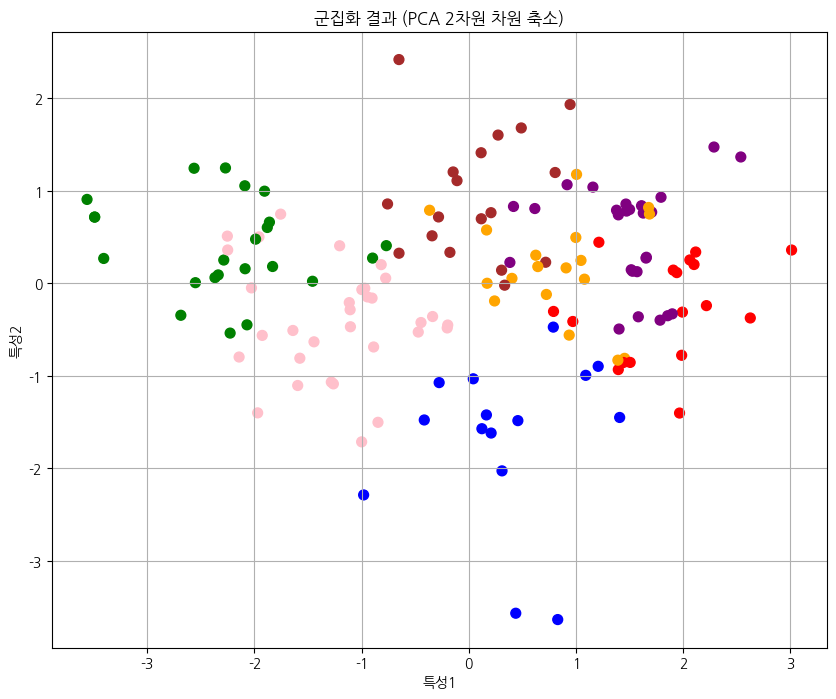

In [13]:


# # NanumGothic 폰트 적용 (한글 표시를 위해)
# plt.rc('font', family='NanumGothic')
# plt.rcParams['axes.unicode_minus'] = False 
# # 예시 데이터 생성 (data_final로 가정)
# # data_final = pd.DataFrame(np.random.rand(100, 5), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])


# # PCA로 2차원으로 차원 축소
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(data_final.drop(columns=['원두 이름', '클러스터']))


# # 결과를 DataFrame에 추가
# data_final['PCA1'] = pca_components[:, 0]
# data_final['PCA2'] = pca_components[:, 1]

# # 클러스터별 색상 지정
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']  # 클러스터 색상 미리 지정
# cluster_colors = data_final['클러스터'].map(lambda x: colors[x])  # 클러스터 값을 색상에 매핑

# # 2D 시각화
# plt.figure(figsize=(10, 8))
# plt.scatter(data_final['PCA1'], data_final['PCA2'], c=cluster_colors, s=50)

# # 축 및 제목 설정
# plt.xlabel('특성1')
# plt.ylabel('특성2')
# plt.title('군집화 결과 (PCA 2차원 차원 축소)')
# plt.grid(True)
# plt.show()

In [53]:
kmeans_constrained

KMeansConstrained(copy_x=True, init='k-means++', max_iter=300, n_clusters=7,
         n_init=10, n_jobs=1, random_state=42, size_max=None, size_min=15,
         tol=0.0001, verbose=False)

In [14]:
import joblib

# 모델을 파일로 저장
joblib.dump(kmeans_constrained, 'kmeans_model.pkl')
joblib.dump(mlb, 'mlb_encoder.pkl')

['mlb_encoder.pkl']

In [15]:
recsys_model = joblib.load('kmeans_model.pkl')
mlb_encoder = joblib.load('mlb_encoder.pkl')



In [54]:
user_input = pd.DataFrame([['some coffee bean', '고소한, 산미 있는, 화사한', 1, 2.5, 3, 1]], 
                          columns=['원두 이름', '맛', '산미', '바디감', '단맛', '쓴맛'])


In [55]:
import time

# 1. 사용자 입력 처리 시간 측정
start_time = time.time()
user_input['맛'] = user_input['맛'].apply(lambda x: [process_taste(taste) for taste in x.split(', ')])
print(f"'맛&향' 처리 시간: {time.time() - start_time}초")

# 2. MultiLabelBinarizer 인코딩 시간 측정
start_time = time.time()
user_taste_encoded = pd.DataFrame(mlb.transform(user_input['맛']), columns=mlb.classes_, index=user_input.index)
print(f"MultiLabelBinarizer 인코딩 시간: {time.time() - start_time}초")

# 3. DataFrame 결합 시간 측정
start_time = time.time()
user_input_final = pd.concat([user_input.drop(columns=['맛', '원두 이름']), user_taste_encoded], axis=1)
print(f"DataFrame 결합 시간: {time.time() - start_time}초")

# 최종 결과 확인
print(user_input_final)

'맛&향' 처리 시간: 0.0009555816650390625초
MultiLabelBinarizer 인코딩 시간: 0.0006642341613769531초
DataFrame 결합 시간: 0.001588582992553711초
   산미  바디감  단맛  쓴맛  가벼운  갈색설탕  견과류  고소한  곡물  구운 견과류  ...  주스같은  차  초콜릿  카라멜  \
0   1  2.5   3   1    0     0    0    1   0       0  ...     0  0    0    0   

   크리미한  트로피칼  풍부한  향신료  허브  화사한  
0     0     0    0    0   0    1  

[1 rows x 40 columns]


In [56]:
user_input_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   산미                       1 non-null      int64  
 1   바디감                      1 non-null      float64
 2   단맛                       1 non-null      int64  
 3   쓴맛                       1 non-null      int64  
 4   가벼운                      1 non-null      int64  
 5   갈색설탕                     1 non-null      int64  
 6   견과류                      1 non-null      int64  
 7   고소한                      1 non-null      int64  
 8   곡물                       1 non-null      int64  
 9   구운 견과류                   1 non-null      int64  
 10  깔끔한                      1 non-null      int64  
 11  깔끔한한                     1 non-null      int64  
 12  꽃                        1 non-null      int64  
 13  다크초콜릿                    1 non-null      int64  
 14  달콤한                      1 non

In [57]:
recsys_data = pd.read_csv("recsys_data.csv", index_col=0)

In [58]:
recsys_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 148
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   원두 이름                    149 non-null    object
 1   산미                       149 non-null    int64 
 2   바디감                      149 non-null    int64 
 3   단맛                       149 non-null    int64 
 4   쓴맛                       149 non-null    int64 
 5   가벼운                      149 non-null    int64 
 6   갈색설탕                     149 non-null    int64 
 7   견과류                      149 non-null    int64 
 8   고소한                      149 non-null    int64 
 9   곡물                       149 non-null    int64 
 10  구운 견과류                   149 non-null    int64 
 11  깔끔한                      149 non-null    int64 
 12  깔끔한한                     149 non-null    int64 
 13  꽃                        149 non-null    int64 
 14  다크초콜릿                    149 non-null    int64 

In [59]:
predicted_cluster = recsys_model.predict(user_input_final, size_min=None, size_max=None)
print(f'입력된 원두는 클러스터 {predicted_cluster[0]}에 속합니다.')

입력된 원두는 클러스터 1에 속합니다.


In [60]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   원두 이름                    149 non-null    object
 1   산미                       149 non-null    int64 
 2   바디감                      149 non-null    int64 
 3   단맛                       149 non-null    int64 
 4   쓴맛                       149 non-null    int64 
 5   가벼운                      149 non-null    int64 
 6   갈색설탕                     149 non-null    int64 
 7   견과류                      149 non-null    int64 
 8   고소한                      149 non-null    int64 
 9   곡물                       149 non-null    int64 
 10  구운 견과류                   149 non-null    int64 
 11  깔끔한                      149 non-null    int64 
 12  깔끔한한                     149 non-null    int64 
 13  꽃                        149 non-null    int64 
 14  다크초콜릿                    149 non-null    i

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# 같은 군집에 속한 원두들 선택
same_cluster_beans = data_final[data_final['클러스터'] == predicted_cluster[0]]

# 유저 입력 원두와 각 원두 간의 코사인 유사도 계산
similarities = cosine_similarity(user_input_final, same_cluster_beans.drop(columns=['원두 이름', '클러스터']))

# 유사도가 높은 상위 10개의 원두 인덱스 찾기 (유사도는 내림차순이므로 -argsort 사용)
top_10_indices = similarities.argsort()[0][-10:][::-1]

# 상위 10개의 원두 정보 출력
top_10_beans = same_cluster_beans.iloc[top_10_indices]
print(top_10_beans[['원두 이름']])

                       원두 이름
103              가배장이 춘천 블렌드
67          3-3커피 미디엄로스트 블렌드
133    3-3커피 디카페인 콜롬비아 안티오키아
41   카메룬 블루마운틴 보요 음베싸 세미 워시드
82            커피맛을조금아는남자 수성못
78                블랙빈스 멜로브라운
104              커피광장 가을 블렌드
34       에티오피아 짐마 디카페인 마운틴워터
42               인디아 아라쿠 내추럴
105               커피광장 봄 블렌드


In [62]:
type(top_10_beans)

pandas.core.frame.DataFrame